# Project 3 - Boston Crime
### By Charlotte Burbridge
---

In [3]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
crimes = pd.read_csv('crime.csv', parse_dates = ['OCCURRED_ON_DATE'])
crimes.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                float64
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

In [5]:
#profile = crimes.profile_report(title='Boston Crimes Profiling')
#profile.to_file(output_file='boston-crimes-profiling.html')

In [6]:
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(0)
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,0,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,0,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,0,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,0,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [7]:
crimes['SHOOTING'] = crimes['SHOOTING'].astype('bool')
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


### Because I can't see any trues in my shooting column, I'm going to use value_counts() to check if they are all false or if there are trues as well.

In [8]:
crimes['SHOOTING'].value_counts()

False    318054
True       1019
Name: SHOOTING, dtype: int64

#### Answer these basic questions, using code to investigate (as much as possible):
What is the range of dates being reported?
What are all the unique groups of offense codes and which are most prevalent in the data?

#### Answer these questions (and produce appropriate accompanying visualizations):
What percentage of murders involved a shooting?
Look at Murder, non-negligent manslaughter (offense_code 111)
Also note that seaborn has no pie chart! If that's what you want, you need to use matplotlib.
Are there certain times of the year when crime is more prevalent in Boston?
If you want to count crimes on each day, you will need to create a new 'date' column by extracting the date from the datetime.
Answer two (or more) unique questions of your own, again using visualizations.

## What is the range of dates being reported?

In [9]:
date_range = str(crimes['OCCURRED_ON_DATE'].dt.date.min()) + ' to ' +str(crimes['OCCURRED_ON_DATE'].dt.date.max())
date_range

# thank you stackoverflow for making this easy for me
# https://stackoverflow.com/questions/65349787/how-to-find-the-range-of-dates-from-a-datetime-column-in-a-dataframe

'2015-06-15 to 2018-09-03'

## What are the unique groups of offense codes and which are most prevalent in the data?

In [10]:
crimes['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

## What percentage of murders involved a shooting?

### First I'm going to make a new dataframe just for crimes with Murder, Non-Negligient Manslaughter

In [11]:
murderdf = crimes.loc[crimes['OFFENSE_CODE'] == 111]
murderdf

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,True,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
5689,I182064699,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,466.0,True,2018-08-14 09:30:00,2018,8,Tuesday,9,Part One,DEERING RD,42.284140,-71.093051,"(42.28414025, -71.09305138)"
6278,I182064056,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,410.0,True,2018-08-11 23:14:00,2018,8,Saturday,23,Part One,MANCHESTER ST,42.274040,-71.076301,"(42.27404039, -71.07630093)"
10813,I182059055,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,908.0,False,2018-07-26 18:14:00,2018,7,Thursday,18,Part One,SHANDON RD,42.295054,-71.089041,"(42.29505434, -71.08904077)"
11021,I182058835,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,435.0,True,2018-07-25 22:57:00,2018,7,Wednesday,22,Part One,NORFOLK ST,42.288048,-71.077667,"(42.28804798, -71.07766654)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312521,I152056746,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E13,639.0,False,2015-07-02 16:30:00,2015,7,Thursday,16,Part One,ROBINWOOD AVE,42.316240,-71.112670,"(42.31624019, -71.11267011)"
312945,I152056250,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A1,112.0,False,2015-07-08 12:15:00,2015,7,Wednesday,12,Part One,CHAUNCY ST,42.352517,-71.061129,"(42.35251737, -71.06112927)"
313764,I152055311,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,322.0,True,2015-07-04 22:47:00,2015,7,Saturday,22,Part One,GLENBURNE ST,42.315122,-71.082520,"(42.31512218, -71.08252020)"
314239,I152054787,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,281.0,True,2015-07-02 23:08:00,2015,7,Thursday,23,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"


### And now stackoverflow helps me find the percentage of murders with shootings (True) and murders without shootings (False)

##### https://stackoverflow.com/questions/52229909/panda-python-calculating-what-percentage-of-values-are-true-and-false-out-of-t

In [12]:
murderdf['SHOOTING'].value_counts(normalize=True).mul(100).astype(str)+'%'

True     75.15527950310559%
False    24.84472049689441%
Name: SHOOTING, dtype: object

### 75.15527950310559% of murders in this dataframe involved a shooting.

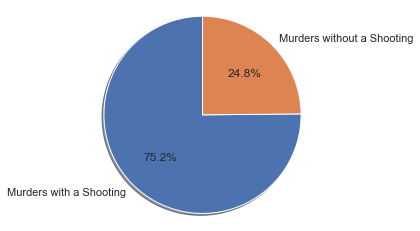

In [13]:
import matplotlib.pyplot as plt
labels = 'Murders with a Shooting', 'Murders without a Shooting'
sizes = [75.15527950310559, 24.84472049689441]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# thank you to matplotlib for teaching me how to use their pie charts 
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

## Are there certain times of the year when crime is more prevalent in Boston?

### I used the column "Month" to get both the number of crimes during each month recorded and just a list of the month numbers

In [14]:
amount = crimes['MONTH'].value_counts()
names = crimes['MONTH'].unique()

# https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python

### And then I was able to make a bar chart to show this.

Text(0.5, 0, 'Months')

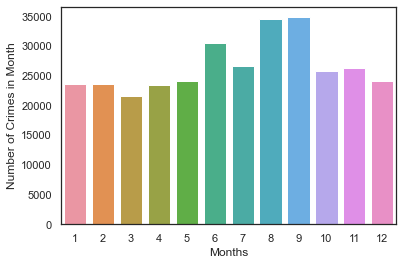

In [15]:
sns.barplot(x=names ,y=amount)
plt.ylabel("Number of Crimes in Month")
plt.xlabel("Months")

## What street has the most crimes reported? And what crime is the most common on that street?

### First I figured out what street has the most crimes reported.

In [16]:
liststreet10 = crimes['STREET'].value_counts().head(10)
liststreet10

WASHINGTON ST        14194
BLUE HILL AVE         7802
BOYLSTON ST           7221
DORCHESTER AVE        5149
TREMONT ST            4796
MASSACHUSETTS AVE     4735
HARRISON AVE          4609
CENTRE ST             4383
COMMONWEALTH AVE      4144
HYDE PARK AVE         3470
Name: STREET, dtype: int64

([<matplotlib.patches.Wedge at 0x7f938a1eb8e0>,
 [Text(0.8145240231028096, 0.739290616597028, 'WASHINGTON ST'),
  Text(-0.3338398140183166, 1.0481178266665518, 'BLUE HILL AVE'),
  Text(-0.9744830446326737, 0.5102771753894493, 'BOYLSTON ST'),
  Text(-1.0859626831222473, -0.1751714898775768, 'DORCHESTER AVE'),
  Text(-0.8578711944661552, -0.6885179835742944, 'TREMONT ST'),
  Text(-0.4279402465920277, -1.0133445343745406, 'MASSACHUSETTS AVE'),
  Text(0.09404253166112739, -1.0959726284167712, 'HARRISON AVE'),
  Text(0.577301873304251, -0.9363346341342943, 'CENTRE ST'),
  Text(0.9227931728596261, -0.5987092450627971, 'COMMONWEALTH AVE'),
  Text(1.0821929448557344, -0.19712541719543314, 'HYDE PARK AVE')])

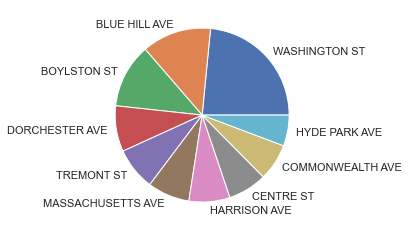

In [17]:
plt.pie(liststreet10, labels = ['WASHINGTON ST', 'BLUE HILL AVE', 'BOYLSTON ST','DORCHESTER AVE', 'TREMONT ST', 'MASSACHUSETTS AVE', 'HARRISON AVE', 'CENTRE ST', 'COMMONWEALTH AVE', 'HYDE PARK AVE'])

### Now, I want to know what crimes happen the most on Washington Street

In [18]:
washingtondf = crimes.loc[crimes['STREET'] == 'WASHINGTON ST']
washingtondf

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
23,I182070909,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550.0,False,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,I182070886,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C11,402.0,False,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
50,I182070877,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E5,562.0,False,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.287889,-71.126586,"(42.28788933, -71.12658585)"
127,I182070798,2629,Harassment,HARASSMENT,C11,450.0,False,2018-09-03 11:36:00,2018,9,Monday,11,Part Two,WASHINGTON ST,42.291316,-71.071703,"(42.29131613, -71.07170293)"
165,I182070759,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E5,562.0,False,2018-09-02 16:45:00,2018,9,Sunday,16,Part One,WASHINGTON ST,42.287889,-71.126586,"(42.28788933, -71.12658585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318944,I140041532-00,3109,Police Service Incidents,SERVICE TO OTHER PD INSIDE OF MA.,C11,450.0,False,2016-04-05 21:30:00,2016,4,Tuesday,21,Part Three,WASHINGTON ST,42.291316,-71.071703,"(42.29131613, -71.07170293)"
318945,I140039570-00,3125,Warrant Arrests,WARRANT ARREST,A1,103.0,False,2015-09-28 11:15:00,2015,9,Monday,11,Part Three,WASHINGTON ST,42.356486,-71.059281,"(42.35648631, -71.05928145)"
318946,I140039570-00,3125,Warrant Arrests,WARRANT ARREST,A1,103.0,False,2015-09-28 11:15:00,2015,9,Monday,11,Part Three,WASHINGTON ST,42.356486,-71.059281,"(42.35648631, -71.05928145)"
318947,I140039570-00,613,Larceny,LARCENY SHOPLIFTING $200 & OVER,A1,103.0,False,2015-09-28 11:15:00,2015,9,Monday,11,Part One,WASHINGTON ST,42.356486,-71.059281,"(42.35648631, -71.05928145)"


In [19]:
topwashington = washingtondf['OFFENSE_DESCRIPTION'].value_counts().head(5)
topwashington

LARCENY SHOPLIFTING              958
INVESTIGATE PERSON               811
SICK/INJURED/MEDICAL - PERSON    721
ASSAULT SIMPLE - BATTERY         699
LARCENY THEFT FROM BUILDING      597
Name: OFFENSE_DESCRIPTION, dtype: int64

([<matplotlib.patches.Wedge at 0x7f938efb8760>,
 [Text(0.7703597361558289, 0.785204353598426, 'LARCENY SHOPLIFTING'),
  Text(-0.7019256872708379, 0.8469358473635191, 'INVESTIGATE PERSON'),
  Text(-1.0163547819588115, -0.4207409621007409, 'SICK/INJURED/MEDICAL - PERSON'),
  Text(5.149471664411205e-08, -1.0999999999999988, 'ASSAULT SIMPLE - BATTERY'),
  Text(0.9677639293089791, -0.5229081918735308, 'LARCENY THEFT FROM BUILDING')])

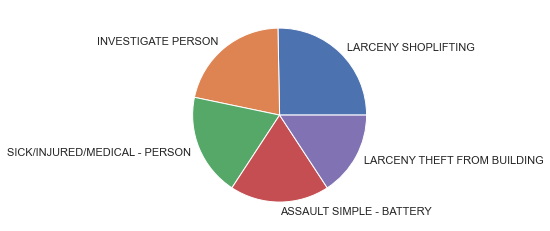

In [20]:
plt.pie(topwashington, labels = ['LARCENY SHOPLIFTING', 'INVESTIGATE PERSON', 'SICK/INJURED/MEDICAL - PERSON','ASSAULT SIMPLE - BATTERY', 'LARCENY THEFT FROM BUILDING'])

## Are there any visible trends in reporting area and time when it comes to murders with and without a shooting?

### I'm going to use my "murderdf" from up above for this.

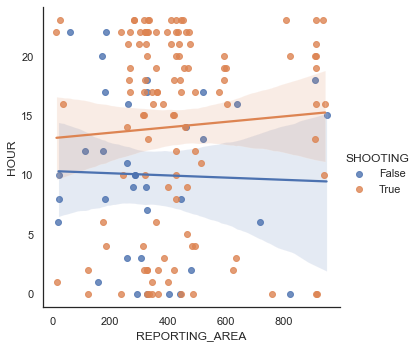

In [25]:
sns.lmplot(x="REPORTING_AREA", y="HOUR", hue="SHOOTING", data=murderdf)

### It seems like shooting murders seem to happen later at night but not , 

## What hour do the most crimes happen according to this dataframe?

In [22]:
hour = crimes['HOUR'].value_counts().head(10)
hour

17    20763
18    20302
16    19871
12    18679
19    17588
14    17189
13    16846
15    16522
11    16448
10    16347
Name: HOUR, dtype: int64

### 5pm (17) is the most common but this is the top 10 hours. Of course, this doesn't mean that there are the hours when the MOST crimes occur, just the hours when the police are called the most for a crime

([<matplotlib.patches.Wedge at 0x7f93a8fec9d0>,
 [Text(1.0289940192990492, 0.38880754654042926, '5pm'),
  Text(0.522545630191441, 0.9679597431545539, '6pm'),
  Text(-0.22283035118002406, 1.0771938704768922, '4pm'),
  Text(-0.8441152075198739, 0.7053151894250402, '12pm'),
  Text(-1.097675463816524, 0.07147430402024779, '7 pm'),
  Text(-0.943431494119909, -0.5656297516067169, '2pm'),
  Text(-0.4670544783640874, -0.9959217410218789, '1pm'),
  Text(0.15575922377751977, -1.08891646337459, '3pm'),
  Text(0.7217961296948169, -0.8300664715295898, '11am'),
  Text(1.055803321334696, -0.30867352762850375, '10am')])

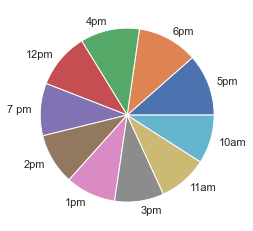

In [23]:
plt.pie(hour, labels = ['5pm', '6pm', '4pm','12pm', '7 pm', '2pm', '1pm', '3pm', '11am', '10am']) 